#### In this notebook will do some data analysis through SQL querying from our database to extract some meaningful insights for our project

### Setting up our Database connection

In [42]:
import pandas as pd
import psycopg2
from sqlalchemy import create_engine

# Replace with your actual credentials
db_config = {
    "host": "dpg-d014uvruibrs73f18lb0-a.virginia-postgres.render.com",
    "port": "5432",
    "database": "air_quality_db_krsa",
    "user": "air_quality_db_krsa_user",
    "password": "IFZsFQrYUubuxadc12LD4qTL9FM0pQqE"
}

engine = create_engine(f"postgresql://{db_config['user']}:{db_config['password']}@{db_config['host']}:{db_config['port']}/{db_config['database']}")

#### 🧪 1. Which city has the highest average AQI?

In [43]:
query = """
SELECT city, AVG(aqi) AS avg_aqi
FROM transformations.final_city_merged mop
JOIN real_time_data.stations s ON mop.station_id = s.station_id
GROUP BY city
ORDER BY avg_aqi DESC
LIMIT 5;
"""

# Read and display results
df = pd.read_sql(query, engine)
print(df)

                                                city     avg_aqi
0  Major Dhyan Chand National Stadium, Delhi, Del...  221.773327
1                                       Beijing (北京)  179.410667
2                                              Paris  142.705676


It seems that India (Delhi) is the city with the highest AQI levels (221.77) which is considered a very unhealthy rate, followed by Beijing (179.41) and Paris (142.71)

#### 📈 2. How has AQI evolved monthly in each city?

       month     avg_aqi
0 2013-12-01  231.000000
1 2014-01-01  256.903226
2 2014-02-01  300.285714
3 2014-03-01  248.645161
4 2014-04-01  221.900000


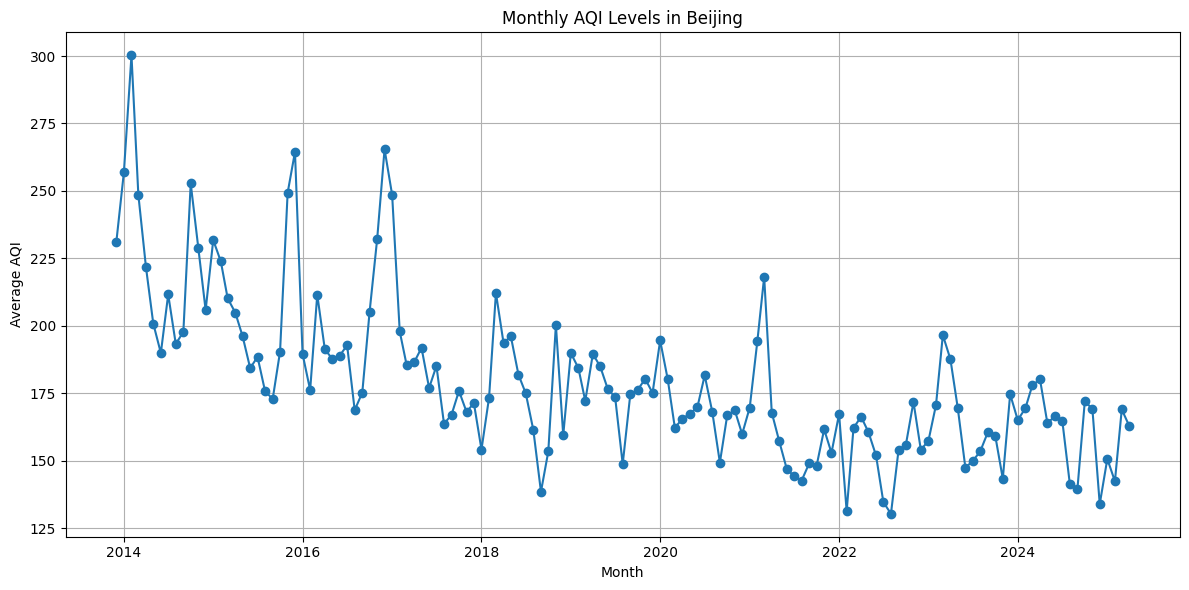

In [44]:
import matplotlib.pyplot as plt

query = """
SELECT DATE_TRUNC('month', datetime) AS month, AVG(aqi) AS avg_aqi
FROM transformations.final_city_merged mop
JOIN real_time_data.stations s ON mop.station_id = s.station_id
WHERE s.city = 'Beijing (北京)'
GROUP BY month
ORDER BY month;
"""

# Load results into a DataFrame
df = pd.read_sql(query, engine)
df['month'] = pd.to_datetime(df['month'])

# Preview data
print(df.head())

# 📈 Plotting the trend
plt.figure(figsize=(12, 6))
plt.plot(df['month'], df['avg_aqi'], marker='o', linestyle='-')
plt.title("Monthly AQI Levels in Beijing")
plt.xlabel("Month")
plt.ylabel("Average AQI")
plt.grid(True)
plt.tight_layout()
plt.show()

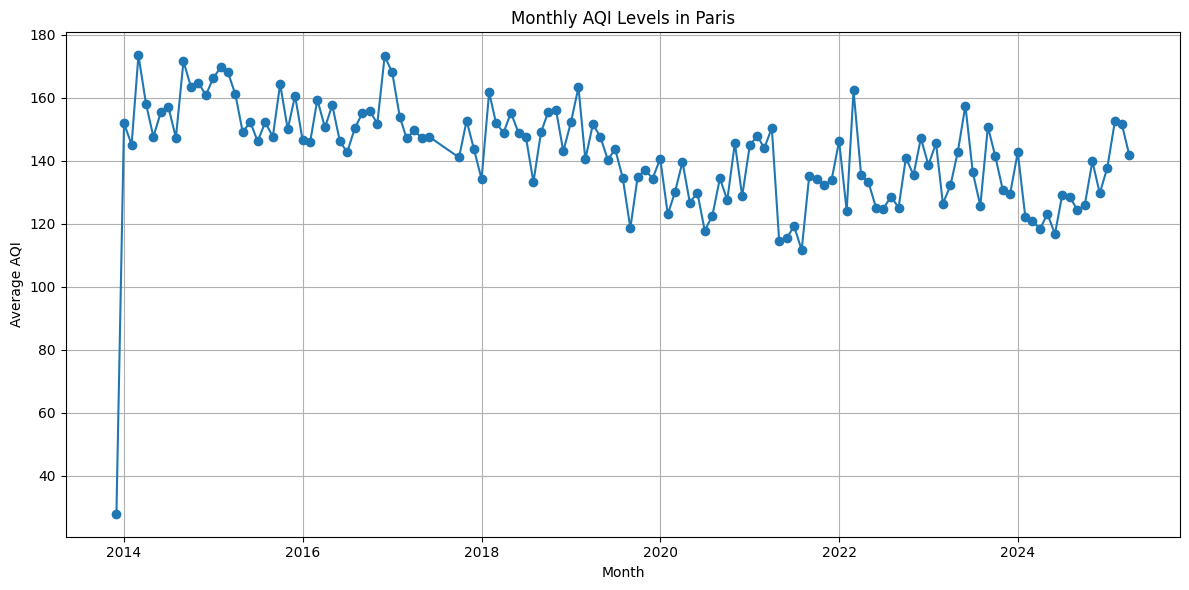

In [56]:
## In France

query = """
SELECT DATE_TRUNC('month', datetime) AS month, AVG(aqi::NUMERIC) AS avg_aqi
FROM transformations.final_city_merged mop
JOIN real_time_data.stations s ON mop.station_id = s.station_id
WHERE s.city = 'Paris'
GROUP BY month
ORDER BY month;
"""

# ✅ Use read_sql_query instead of read_sql
df = pd.read_sql_query(query, engine)
df['month'] = pd.to_datetime(df['month'])

# 📈 Plotting
plt.figure(figsize=(12, 6))
plt.plot(df['month'], df['avg_aqi'], marker='o', linestyle='-')
plt.title("Monthly AQI Levels in Paris")
plt.xlabel("Month")
plt.ylabel("Average AQI")
plt.grid(True)
plt.tight_layout()
plt.show()

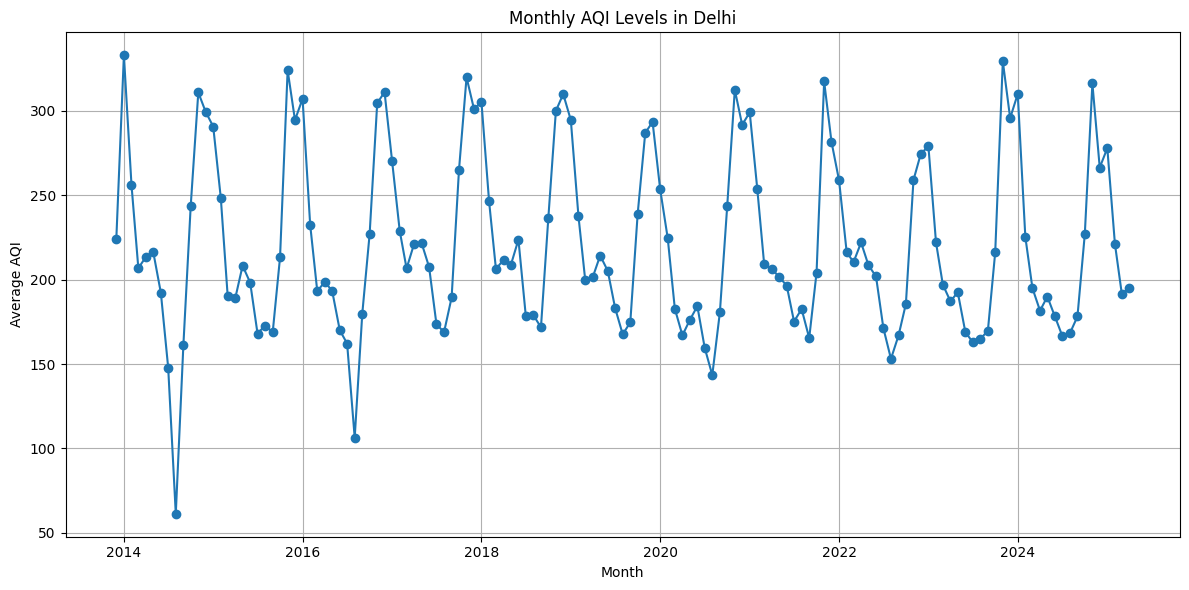

In [57]:
## In India

query = """
SELECT DATE_TRUNC('month', datetime) AS month, AVG(aqi::NUMERIC) AS avg_aqi
FROM transformations.final_city_merged mop
JOIN real_time_data.stations s ON mop.station_id = s.station_id
WHERE s.city = 'Major Dhyan Chand National Stadium, Delhi, Delhi, India'
GROUP BY month
ORDER BY month;
"""

# ✅ Use read_sql_query instead of read_sql
df = pd.read_sql_query(query, engine)
df['month'] = pd.to_datetime(df['month'])

# 📈 Plotting
plt.figure(figsize=(12, 6))
plt.plot(df['month'], df['avg_aqi'], marker='o', linestyle='-')
plt.title("Monthly AQI Levels in Delhi")
plt.xlabel("Month")
plt.ylabel("Average AQI")
plt.grid(True)
plt.tight_layout()
plt.show()

From these plots, we observe that the average AQI in China has been steadily decreasing, dropping from around 300 in 2014 to approximately 150 in recent years. In Paris, the average AQI remains relatively consistent over time, with a slight downward trend. However, the AQI levels in Paris are generally lower than those in Beijing and Delhi. In India, the AQI levels show a consistent pattern with noticeable fluctuations—periodically rising and falling throughout the months. Most AQI readings in India are significantly high, mostly exceeding 200.

#### ✅ Top GHE causes by average burden in China, France, and India

In [47]:
# Top GHE causes in China

query = """
SELECT
    ghe_cause,
    ROUND(AVG(age_standardized_rate::NUMERIC), 2) AS avg_burden
FROM burden_data.china_dataset
GROUP BY ghe_cause
ORDER BY avg_burden DESC;
"""

# Load into DataFrame
df = pd.read_sql(query, engine)
print(df)

                               ghe_cause  avg_burden
0                                  Total     2449.85
1                                 Stroke      764.54
2                Ischaemic Heart Disease      707.81
3  Chronic Obstructive Pulmonary Disease      462.09
4                            Lung Cancer      302.30
5     Acute Lower Respiratory Infections      207.24


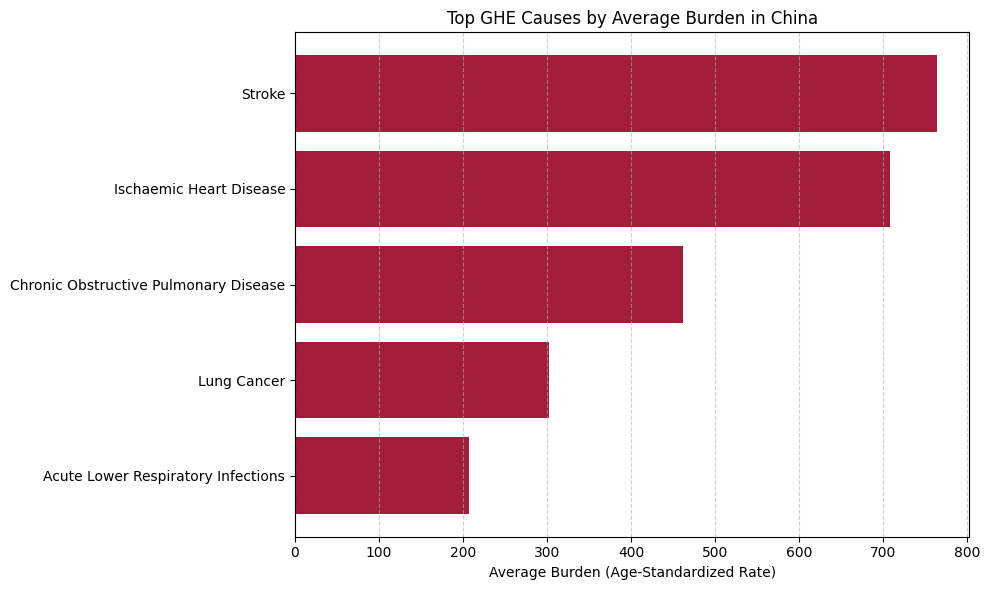

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Sort to display in descending order (ignoring 'Total' for a cleaner chart)
df_sorted = df[df['ghe_cause'] != 'Total'].sort_values(by='avg_burden', ascending=True)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(df_sorted['ghe_cause'], df_sorted['avg_burden'], color='#a11d3a')
plt.xlabel('Average Burden (Age-Standardized Rate)')
plt.title('Top GHE Causes by Average Burden in China')
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

In [49]:
# Top GHE causes in France

query = """
SELECT
    ghe_cause,
    ROUND(AVG(age_standardized_rate::NUMERIC), 2) AS avg_burden
FROM burden_data.france_dataset
GROUP BY ghe_cause
ORDER BY avg_burden DESC;
"""

# Load into DataFrame
df = pd.read_sql(query, engine)
print(df)

                               ghe_cause  avg_burden
0                                  Total      239.70
1                Ischaemic Heart Disease      117.71
2                            Lung Cancer       43.28
3                                 Stroke       40.91
4  Chronic Obstructive Pulmonary Disease       20.80
5     Acute Lower Respiratory Infections       17.00


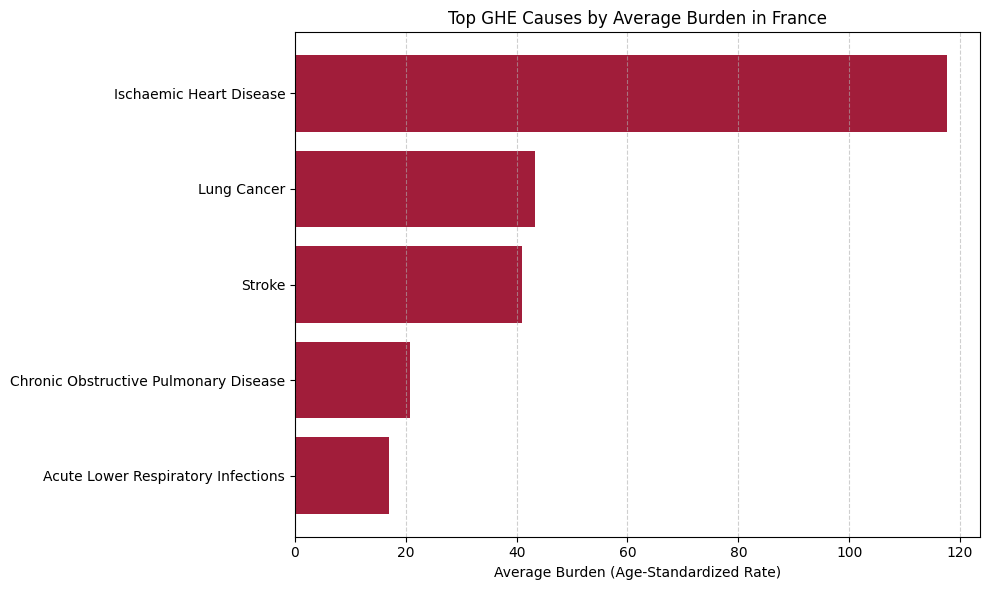

In [50]:
# Sort to display in descending order (ignoring 'Total' for a cleaner chart)
df_sorted = df[df['ghe_cause'] != 'Total'].sort_values(by='avg_burden', ascending=True)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(df_sorted['ghe_cause'], df_sorted['avg_burden'], color='#a11d3a')
plt.xlabel('Average Burden (Age-Standardized Rate)')
plt.title('Top GHE Causes by Average Burden in France')
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

In [51]:
# Top GHE causes in India

query = """
SELECT
    ghe_cause,
    ROUND(AVG(age_standardized_rate::NUMERIC), 2) AS avg_burden
FROM burden_data.india_dataset
GROUP BY ghe_cause
ORDER BY avg_burden DESC;
"""

# Load into DataFrame
df = pd.read_sql(query, engine)
print(df)

                               ghe_cause  avg_burden
0                                  Total     4297.22
1                Ischaemic Heart Disease     1536.41
2  Chronic Obstructive Pulmonary Disease     1036.27
3     Acute Lower Respiratory Infections     1000.28
4                                 Stroke      603.50
5                            Lung Cancer       90.66


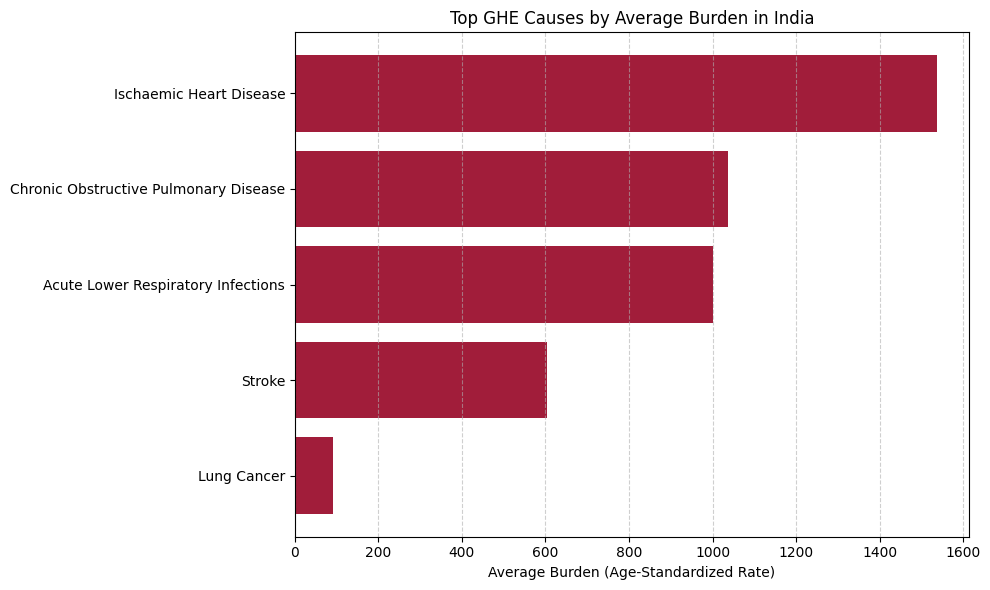

In [52]:
# Sort to display in descending order (ignoring 'Total' for a cleaner chart)
df_sorted = df[df['ghe_cause'] != 'Total'].sort_values(by='avg_burden', ascending=True)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(df_sorted['ghe_cause'], df_sorted['avg_burden'], color='#a11d3a')
plt.xlabel('Average Burden (Age-Standardized Rate)')
plt.title('Top GHE Causes by Average Burden in India')
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

The above plots and analyses show that while Stroke is the top GHE cause in China, Ischaemic Heart Disease is considered as the top GHE cause by average burden in India and France

#### ✅ Comparing average AQI with health burden (age standardized rate)

C:\Users\MaisoonAboFakher\AppData\Local\Temp\ipykernel_28092\3778152789.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


   year  avg_health_burden  avg_aqi
0  2013             916.77   231.00
1  2014             842.20   225.40
2  2015             788.02   207.64
3  2016             739.83   198.96
4  2017             705.54   185.05
5  2018             651.02   174.94
6  2019             617.02   177.11


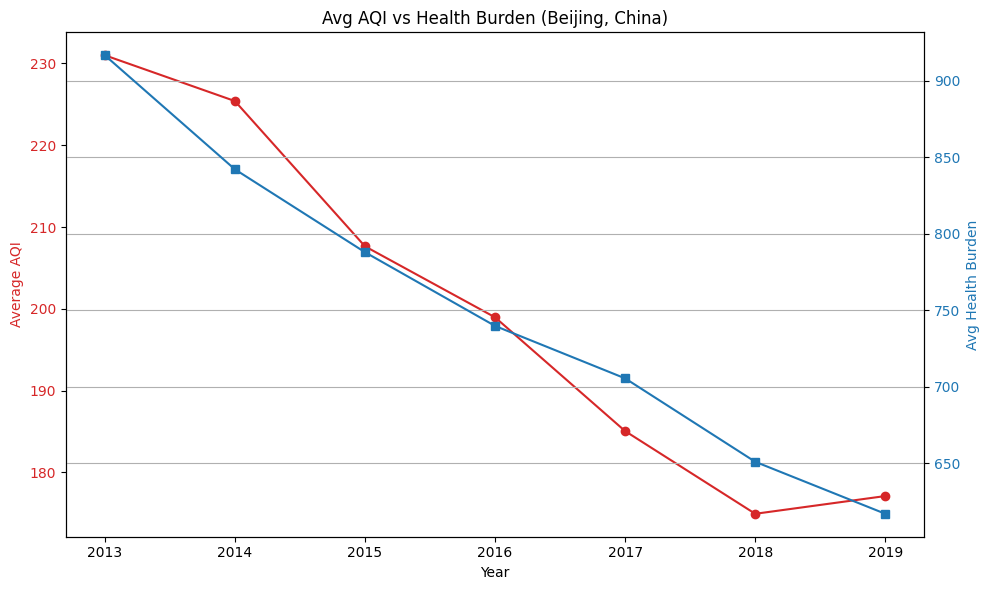

In [53]:
# Comparing Average AQI with Health burden (age standardized rate) in China

query = """
SELECT h.year,
       ROUND(AVG(h.age_standardized_rate::NUMERIC), 2) AS avg_health_burden,
       ROUND(AVG(m.aqi::NUMERIC), 2) AS avg_aqi
FROM burden_data.china_dataset h
JOIN transformations.final_city_merged m
  ON EXTRACT(YEAR FROM m.datetime) = h.year::INTEGER
 AND m.station_id IN (
    SELECT station_id
    FROM real_time_data.stations
    WHERE city ILIKE '%beijing%'
)
GROUP BY h.year
ORDER BY h.year;
"""

# --- Execute & Fetch ---
conn = psycopg2.connect(**db_config)
df = pd.read_sql_query(query, conn)
conn.close()

print(df)

# --- Plot ---
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel('Year')
ax1.set_ylabel('Average AQI', color='tab:red')
ax1.plot(df['year'], df['avg_aqi'], marker='o', color='tab:red', label='Average AQI')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()
ax2.set_ylabel('Avg Health Burden', color='tab:blue')
ax2.plot(df['year'], df['avg_health_burden'], marker='s', color='tab:blue', label='Avg Health Burden')
ax2.tick_params(axis='y', labelcolor='tab:blue')

plt.title('Avg AQI vs Health Burden (Beijing, China)')
fig.tight_layout()
plt.grid(True)
plt.show()

C:\Users\MaisoonAboFakher\AppData\Local\Temp\ipykernel_28092\382643992.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


   year  avg_health_burden  avg_aqi
0  2013              84.46    28.00
1  2014              75.44   158.06
2  2015              79.10   157.20
3  2016              72.53   152.96
4  2017              71.64   150.63
5  2018              70.36   148.63
6  2019              65.84   141.41


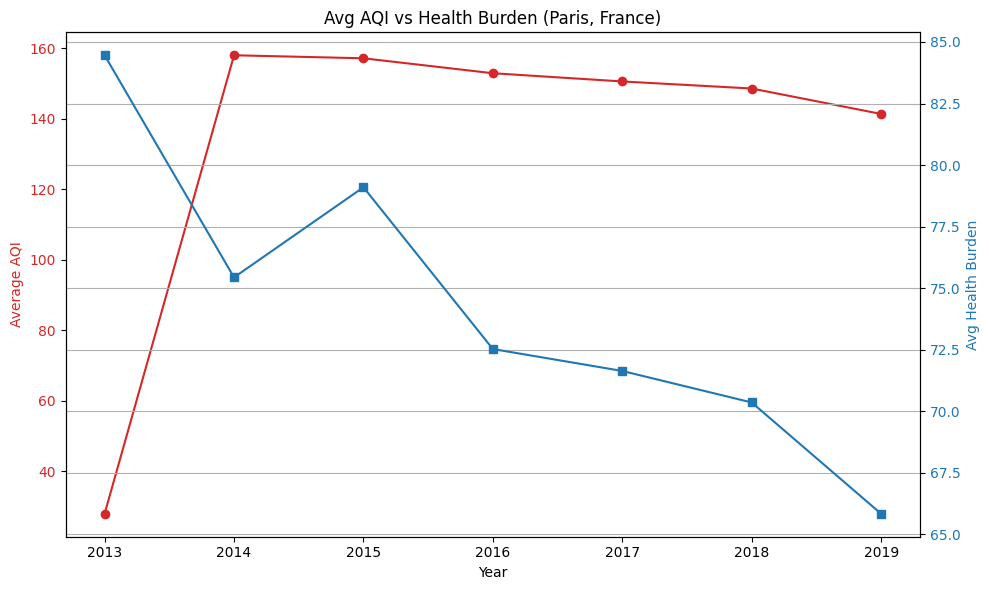

In [54]:
# Comparing Average AQI with Health burden (age standardized rate) in France

query = """
SELECT h.year,
       ROUND(AVG(h.age_standardized_rate::NUMERIC), 2) AS avg_health_burden,
       ROUND(AVG(m.aqi::NUMERIC), 2) AS avg_aqi
FROM burden_data.france_dataset h
JOIN transformations.final_city_merged m
  ON EXTRACT(YEAR FROM m.datetime) = h.year::INTEGER
 AND m.station_id IN (
    SELECT station_id
    FROM real_time_data.stations
    WHERE city ILIKE '%paris%'
)
GROUP BY h.year
ORDER BY h.year;
"""

# --- Execute & Fetch ---
conn = psycopg2.connect(**db_config)
df = pd.read_sql_query(query, conn)
conn.close()

print(df)

# --- Plot ---
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel('Year')
ax1.set_ylabel('Average AQI', color='tab:red')
ax1.plot(df['year'], df['avg_aqi'], marker='o', color='tab:red', label='Average AQI')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()
ax2.set_ylabel('Avg Health Burden', color='tab:blue')
ax2.plot(df['year'], df['avg_health_burden'], marker='s', color='tab:blue', label='Avg Health Burden')
ax2.tick_params(axis='y', labelcolor='tab:blue')

plt.title('Avg AQI vs Health Burden (Paris, France)')
fig.tight_layout()
plt.grid(True)
plt.show()

C:\Users\MaisoonAboFakher\AppData\Local\Temp\ipykernel_28092\1105949052.py:21: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


   year  avg_health_burden  avg_aqi
0  2013            1543.30   224.00
1  2014            1458.27   223.48
2  2015            1397.79   223.18
3  2016            1333.28   226.03
4  2017            1264.45   231.65
5  2018            1226.58   231.41
6  2019            1157.01   224.62


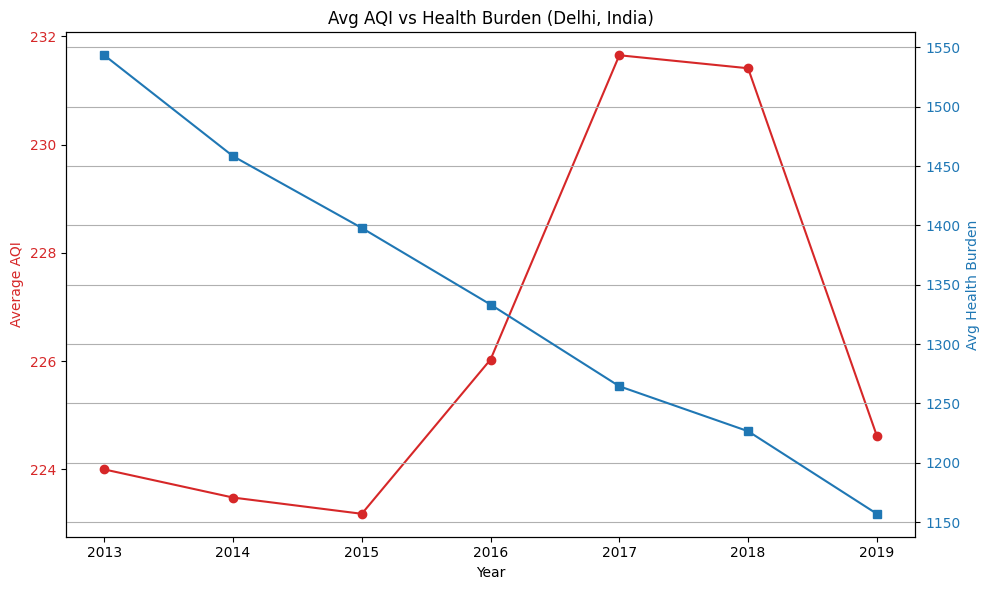

In [55]:
# Comparing Average AQI with Health burden (age standardized rate) in India

query = """
SELECT h.year,
       ROUND(AVG(h.age_standardized_rate::NUMERIC), 2) AS avg_health_burden,
       ROUND(AVG(m.aqi::NUMERIC), 2) AS avg_aqi
FROM burden_data.india_dataset h
JOIN transformations.final_city_merged m
  ON EXTRACT(YEAR FROM m.datetime) = h.year::INTEGER
 AND m.station_id IN (
    SELECT station_id
    FROM real_time_data.stations
    WHERE city ILIKE '%Delhi%'
)
GROUP BY h.year
ORDER BY h.year;
"""

# --- Execute & Fetch ---
conn = psycopg2.connect(**db_config)
df = pd.read_sql_query(query, conn)
conn.close()

print(df)

# --- Plot ---
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel('Year')
ax1.set_ylabel('Average AQI', color='tab:red')
ax1.plot(df['year'], df['avg_aqi'], marker='o', color='tab:red', label='Average AQI')
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()
ax2.set_ylabel('Avg Health Burden', color='tab:blue')
ax2.plot(df['year'], df['avg_health_burden'], marker='s', color='tab:blue', label='Avg Health Burden')
ax2.tick_params(axis='y', labelcolor='tab:blue')

plt.title('Avg AQI vs Health Burden (Delhi, India)')
fig.tight_layout()
plt.grid(True)
plt.show()

From these plots, we can see strong correlation between average AQI and average age standardized rate in China. Average age standardized rate is decreasing in China across the years from 2013 to 2019 so is the average AQI that decreased from about 231 in 2013 to about 177 in 2019.

France also showed quite a correlation between average AQI and average age standardized rate. AQI seems to be slightly decreaasing from about 158 in 2014 to about 141 in 2019. The average age standardized rate also decreased sharply from 75.44 million in 2014 to 65.84 million in 2019

As for India, the average AQI shows variations across the years. It slightly deacreased from 2013 to 2015, increased sharply from 2015 to 2017, and then dropped sharply from 2017 to 2019. As for the average age standardized rate it showed steady decrease across the years from 1543.3 million in 2013 to 1157 million in 2019